# Búsqueda de atributos

Esta notebook es para generar nuevos atributos para el dataframe


In [1]:
%pylab inline
import sys
sys.path.append("..")

import numpy as np
import config
from dataframe_builder import load_test_dataframe

df = load_test_dataframe(cache=False, delete_text=False).dataframe

print df.columns

Populating the interactive namespace from numpy and matplotlib
Armando dataframe...
Dataframe construído
Dimensiones: (9000, 80)
Index([u'class', u'text', u'multipart/mixed', u'text/html',
       u'multipart/alternative', u'text/plain', u'multipart/related',
       u'multipart/report', u'text/plain charset="us-ascii"',
       u'text/html charset=iso-8859-1', u'application/vnd.ms-excel',
       u'message/rfc822', u'text/enriched', u'text/richtext', u'image/pjpeg',
       u'application/msword', u'application/octet-stream', u'len', u'spaces',
       u'has_html', u'has_original_message', u'has_dear', u'has_friend',
       u'has_hello', u'has_$', u'has_earn', u'has_investment', u'has_profit',
       u'has_profits', u'has_credit', u'has_opportunity', u'has_income',
       u'has_cost', u'has_promotion', u'has_why pay more?', u'has_f r e e',
       u'has_click', u'has_add', u'has_meet singles', u'has_viagra',
       u'has_sex', u'has_penis', u'has_vagina', u'has_pussy', u'has_fuck',
       u'h

# From y to

Veamos la pinta de los remitentes y recipientes

Primero, agarro algo de spam y ham

In [2]:

spam = df[df['class'] == 'spam'].sample(30)
ham = df[df['class'] == 'ham'].sample(30)


In [3]:
print "Enviadores de spam"
print "="* 100
print "\n".join(spam.from_text)
print "\n\nEnviadores de ham"
print "="* 100
print "\n".join(ham.from_text)


Enviadores de spam
=?Windows-1251?B?INHw7vft7g==?= <chakkala@yahoo.com>
"gewrg" <gmgdk@yahoo.com>
"Kasey Goss" <kgoss@allaban.fr>
"azic2nrftr" <azic2nrftr@yahoo.co.kr>
"computron" <khatun#####>
"¼y¯¬¨â¶g¦~100mb½u¸ô" <rsycyz@ciaoweb.it>
bernardmcarthy150#####
"lakisha quintero" <ilorhxl#####>
"<¹«·áÀÚ·á>" <oopo2323k@com.ne.kr>
Noreply <noreply@usg-jobsupport.com>
"Chris Crowley" <Chamberswbd@netscape.net>
"brian benton" <flora.preston#####>
"Scoffed F. Tunisia" <tucker@tlcfan.com>
"roxie mckee" <hqvlsknhck#####>
Nigel <abeli@publicist.com>
"Lobo Rossana" <Hariadi@goodgirlz.com>
"armando metcalf" <natalie_archer#####>
"hong" <jml#####>
"misty " <alfonsodyad4211020#####>
order <Keri@brars.org.uk>
"Lola Pham" <lola.pham@posta.hu>
<241933#####>
"Merle Griffin" <efknmdpkrulaxk@joesnyc.streetnine.com>
"julia merritt" <honosh#####>
"david" <david#####>
"customer support" <support#####>
"damien putnam" <jacobus@songwriterstipjar.net>
"casandra austin" <stesha@killerfrogs.com>
"SatisfyHer" <uLol

In [4]:
print "Receptores de spam"
print "="* 100
print "\n".join(spam.to_text)
print "\nReceptores de ham"
print "="* 100
print "\n".join(ham.to_text)


Receptores de spam
MIKE.SWERZBIN@ENRON.COM
Sean.Crandall@enron.com
mwhitt@ect.enron.com
Vladi.Pimenov@ENRON.com
<paliourg#####>
kkeiser@ect.enron.com

<paliourg#####>
Joe.Parks@ENRON.com
Martin.Cuilla <Martin.Cuilla@Enron.com>
equity@enron.com, KRUSCIT@enron.com
"kenelm madison" <paliourg#####>
Larry.Campbell <Larry.Campbell@ENRON.com>
<vangelis#####>
PAUL.T.LUCCI@ENRON.COM
"Ungureanu Iulian" <btychol@ect.enron.com>
<adam#####>
##########
<paliourg#####>
mhaedic@ect.enron.com
scranda@ect.enron.com
<paliourg#####>
"Geoff.Storey" <Geoff.Storey@enron.com>;Geoff.Storey@enron.com
<paliourg#####>
<paliourg#####>
"paliourg" <paliourg#####>
"Terry Castenanos" <Mark_McConnell@enron.com>
"Latonya Campbell" <MATT.MOTLEY@enron.com>
Diana.Scholtes@ENRON.com
emclaug@enron.com

Receptores de ham
"Ogden, Mary" <Mary.Ogden@ENRON.com>,
	"Bailey, Susan" <Susan.Bailey@ENRON.com>
louise.kitchen#####
"Mintz, Jordan" <Jordan.Mintz@ENRON.com>,
	"Redmond, Brian" <Brian.Redmond@ENRON.com>,
	"Hodge, Jeffrey T." 

In [5]:
import re

first_ham = ham.iloc[0]

re.findall(r'<.*>', first_ham.to_text)

print df.number_of_receivers.unique()

[  0   1   2   6   3   9   5  12   7  13   4  14   8  18  54  16  23  31
  36  10  35  25 174  24  33  15  29  11  21 115  41  57  27  26  17 128
  22  20  28  58  32  70  19  49  99  30  80  71  42 106  89  72  34  81
 136  38  59 112  90  74 127 110  77  67  43  37  66  39  78  56  92 124
  84 103  62 126  73  75  47  85  88  61  48  40 118  79  45  83  94  51
  44 140  76 125 108 109 111 141  82]


In [6]:

print "NON ASCII totales: {}".format(np.count_nonzero(df.from_non_ascii == False))

print "NON ASCII (con clase spam): {}".format(np.count_nonzero(df[df.from_non_ascii == False]['class'] == 'spam'))
print "NON ASCII (con clase spam): {}".format(np.count_nonzero(df[df.from_non_ascii == False]['class'] == 'ham'))



NON ASCII totales: 279
NON ASCII (con clase spam): 279
NON ASCII (con clase spam): 0


# Distribución horaria y por día


(array([  437.,   569.,  1377.,  1140.,   754.,   222.]),
 array([  0.        ,   3.83333333,   7.66666667,  11.5       ,
         15.33333333,  19.16666667,  23.        ]),
 <a list of 6 Patch objects>)

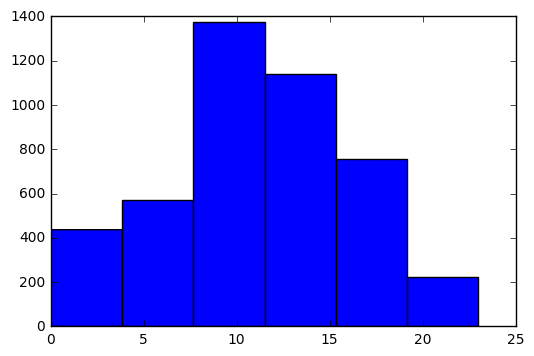

In [13]:
ham = df[df['class'] == 'ham']
spam = df[df['class'] == 'spam']

hist(ham.hour, range=[0, 23], bins=6)


(array([ 729.,  757.,  711.,  750.,  682.,  739.]),
 array([  0.        ,   3.83333333,   7.66666667,  11.5       ,
         15.33333333,  19.16666667,  23.        ]),
 <a list of 6 Patch objects>)

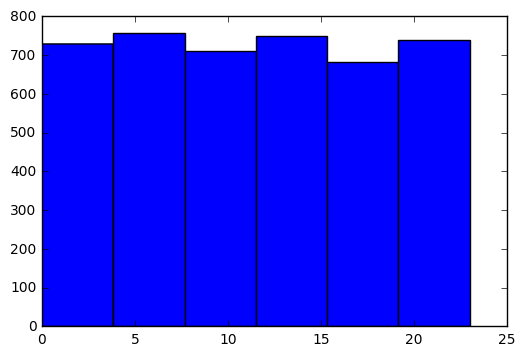

In [14]:

hist(spam.hour, range=[0, 23], bins=6)

Podemos observar en los dos histogramas anteriores que mientras el spam se distribuye 